# Visualizations

In [18]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import seaborn as sns
import pickle
import numpy as np


%matplotlib inline
sns.set()


datafolderviz = "/data/fanny.jourdan/TaCo/"

modeltype = "RoBERTa"
#modeltype = "DistilBERT"
#modeltype = "DeBERTa"

mlp_or_lin = "mlp"
method_name = "sSVD"
method_name2 = "PCA" #None
method_name3 = "ICA" #None
num_components = 20

min_gender = 0.62679

#baseline1 = model train on BIOS (without debiasing method)
#baseline2 = model train on BIOS-neutral (without debiasing method)
if modeltype == "RoBERTa":
    acc_gender_baseline1 = 0.96013
    acc_occ_baseline1 = 0.8639
    acc_gender_baseline2 = 0.79798
    acc_occ_baseline2 = 0.8608
elif modeltype == "DistilBERT":
    acc_gender_baseline1 = 0.98385
    acc_occ_baseline1 = 0.8616
    acc_gender_baseline2 = 0.84357
    acc_occ_baseline2 = 0.8591
elif modeltype == "DeBERTa":
    acc_gender_baseline1 = 0.69671
    acc_occ_baseline1 = 0.8591
    acc_gender_baseline2 = 0.70569
    acc_occ_baseline2 = 0.8584

In [19]:
concept_removed = list(range(0,num_components))

if method_name2 is None:
    save = basesavepath + f"plot_accuracy_{modeltype}_{method_name}{num_components}_{mlp_or_lin}"
else:
    if method_name3 is None:
        save = basesavepath + f"plot_accuracy_{modeltype}_{method_name}AND{method_name2}{num_components}_{mlp_or_lin}"
    else:
        save = basesavepath + f"plot_accuracy_{modeltype}_{method_name}AND{method_name2}AND{method_name3}{num_components}_{mlp_or_lin}"


plotmethod2, plotmethod3 = False, False 

In [20]:
nb_reps = 5

#list created with the run_concepts_remov.py file
l_acc_occ_method1 = pickle.load(open(datafolderviz + f'list_results/l_occupation_acc_{modeltype}_{method_name}{num_components}_{mlp_or_lin}_baseline_normal_{nb_reps}reps.pkl',"rb"))
l_acc_gender_method1 = pickle.load(open(datafolderviz + f'list_results/l_gender_acc_{modeltype}_{method_name}{num_components}_{mlp_or_lin}_baseline_normal_{nb_reps}reps.pkl',"rb"))
acc_occ = [acc_occ_baseline1] + [np.mean(sublist) for sublist in l_acc_occ_method1]
acc_gender = [acc_gender_baseline1] + [np.mean(sublist) for sublist in l_acc_gender_method1]


if method_name2 is not None:
    plotmethod2 = True
    l_acc_occ_method2 = pickle.load(open(datafolderviz + f'list_results/l_occupation_acc_{modeltype}_{method_name2}{num_components}_{mlp_or_lin}_baseline_normal_{nb_reps}reps.pkl',"rb"))
    l_acc_gender_method2 = pickle.load(open(datafolderviz + f'list_results/l_gender_acc_{modeltype}_{method_name2}{num_components}_{mlp_or_lin}_baseline_normal_{nb_reps}reps.pkl',"rb"))
    acc_occ_method2 = [acc_occ_baseline1] + [np.mean(sublist) for sublist in l_acc_occ_method2]
    acc_gender_method2 = [acc_gender_baseline1] + [np.mean(sublist) for sublist in l_acc_gender_method2]


if method_name3 is not None:
    plotmethod3 = True
    l_acc_occ_method3 = pickle.load(open(datafolderviz + f'list_results/l_occupation_acc_{modeltype}_{method_name3}{num_components}_{mlp_or_lin}_baseline_normal_{nb_reps}reps.pkl',"rb"))
    l_acc_gender_method3 = pickle.load(open(datafolderviz + f'list_results/l_gender_acc_{modeltype}_{method_name3}{num_components}_{mlp_or_lin}_baseline_normal_{nb_reps}reps.pkl',"rb"))
    acc_occ_method3 = [acc_occ_baseline1] + [np.mean(sublist) for sublist in l_acc_occ_method3]
    acc_gender_method3 = [acc_gender_baseline1] + [np.mean(sublist) for sublist in l_acc_gender_method3]

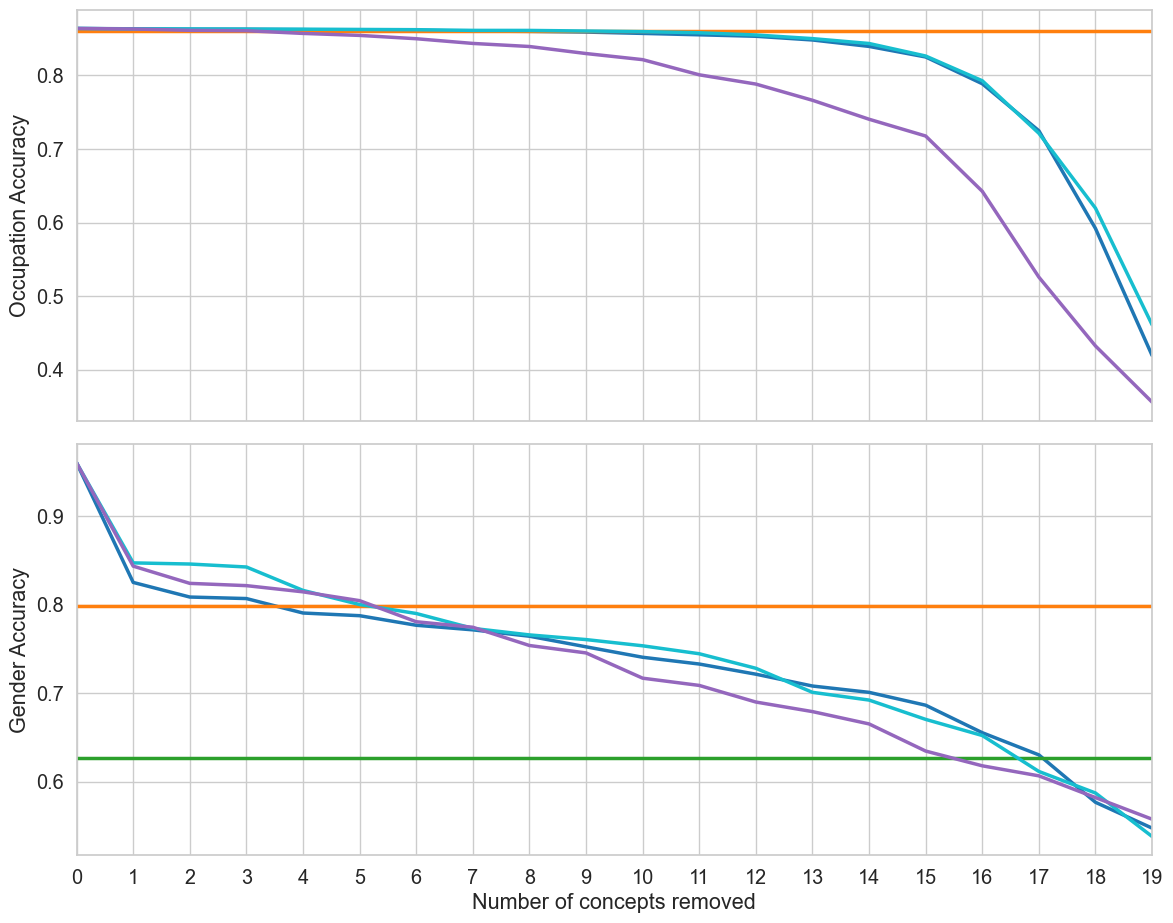

In [24]:
legend = False

# Define colors for the methods using a custom palette
our_method_color = "#1f77b4"  # Blue
baseline2_color = "#ff7f0e"  # Orange
min_gender_color = "#2ca02c"  # Green
method2_color = "#17becf"  # Cyan
method3_color = "#9467bd"  # Purple


sns.set(font_scale=1.3)
sns.set_style("white" if legend else "whitegrid")

num_points = len(concept_removed)
acc_occ_baseline2_line = [acc_occ_baseline2]*num_points
acc_gender_baseline2_line = [acc_gender_baseline2]*num_points
min_gender_line = [min_gender]*num_points

# Prepare the DataFrame
data = {
    "Number of concepts removed": concept_removed * (9 if plotmethod2 and plotmethod3 else 7 if plotmethod2 else 5),
    "Accuracy": acc_occ + acc_occ_baseline2_line + acc_gender + acc_gender_baseline2_line + min_gender_line + 
               (acc_occ_method2 + acc_gender_method2 if plotmethod2 else []) + 
               (acc_occ_method3 + acc_gender_method3 if plotmethod3 else []),
    "Method": (['Our method (Occupation)'] * num_points + 
               ['Baseline 2 (Occupation)'] * num_points + 
               ['Our method (Gender)'] * num_points + 
               ['Baseline 2 (Gender)'] * num_points + 
               ['Min Gender'] * num_points + 
               (['Method 2 (Occupation)'] * num_points + ['Method 2 (Gender)'] * num_points if plotmethod2 else []) + 
               (['Method 3 (Occupation)'] * num_points + ['Method 3 (Gender)'] * num_points if plotmethod3 else [])),
    "Metric": (['Occupation'] * num_points * 2 + 
               ['Gender'] * num_points * 3 + 
               (['Occupation'] * num_points + ['Gender'] * num_points if plotmethod2 else []) + 
               (['Occupation'] * num_points + ['Gender'] * num_points if plotmethod3 else []))
}

df = pd.DataFrame(data)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Define color palette
palette = {
    'Our method (Occupation)': our_method_color,
    'Our method (Gender)': our_method_color,
    'Baseline 2 (Occupation)': baseline2_color,
    'Baseline 2 (Gender)': baseline2_color,
    'Min Gender': min_gender_color,
    'Method 2 (Occupation)': method2_color,
    'Method 2 (Gender)': method2_color,
    'Method 3 (Occupation)': method3_color,
    'Method 3 (Gender)': method3_color
}

# Top plot for Occupation
sns.lineplot(data=df[df['Metric'] == 'Occupation'], x="Number of concepts removed", y="Accuracy", hue="Method", palette=palette, ax=ax1, linewidth=2.5)

# Bottom plot for Gender
sns.lineplot(data=df[df['Metric'] == 'Gender'], x="Number of concepts removed", y="Accuracy", hue="Method", palette=palette, ax=ax2, linewidth=2.5)

# Adjust legend
if legend:
    handles, labels = ax1.get_legend_handles_labels()
    # Remove duplicates and unnecessary entries
    unique_labels = ['Our method'] + ([method_name2 + ' variant'] if plotmethod2 else []) + ([method_name3 + ' variant'] if plotmethod3 else []) + ['Baseline 2', 'Min Gender']
    unique_handles = [Line2D([], [], color=our_method_color, label='Our method')] + ([Line2D([], [], color=method2_color, label='Method 2')] if plotmethod2 else []) + ([Line2D([], [], color=method3_color, label='Method 3')] if plotmethod3 else []) + [Line2D([], [], color=baseline2_color, label='Baseline 2'), Line2D([], [], color=min_gender_color, label='Min Gender')]
    fig.legend(handles=unique_handles, labels=unique_labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=1, frameon=True)

# Remove individual legends
ax1.get_legend().remove()
ax2.get_legend().remove()

# Add labels
ax1.set_ylabel('Occupation Accuracy')
ax2.set_ylabel('Gender Accuracy')
ax2.set_xlabel('Number of concepts removed')

# Set x-axis limits
ax1.set_xlim(0, len(concept_removed) - 1)
ax2.set_xlim(0, len(concept_removed) - 1)

# Adjust x-ticks
plt.xticks(ticks=concept_removed, labels=concept_removed)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

# if legend:
#   plt.savefig(datafolderviz + "figures/"+save+'_legend.png')
# else:
#   plt.savefig(datafolderviz + "figures/"+save+'.png')

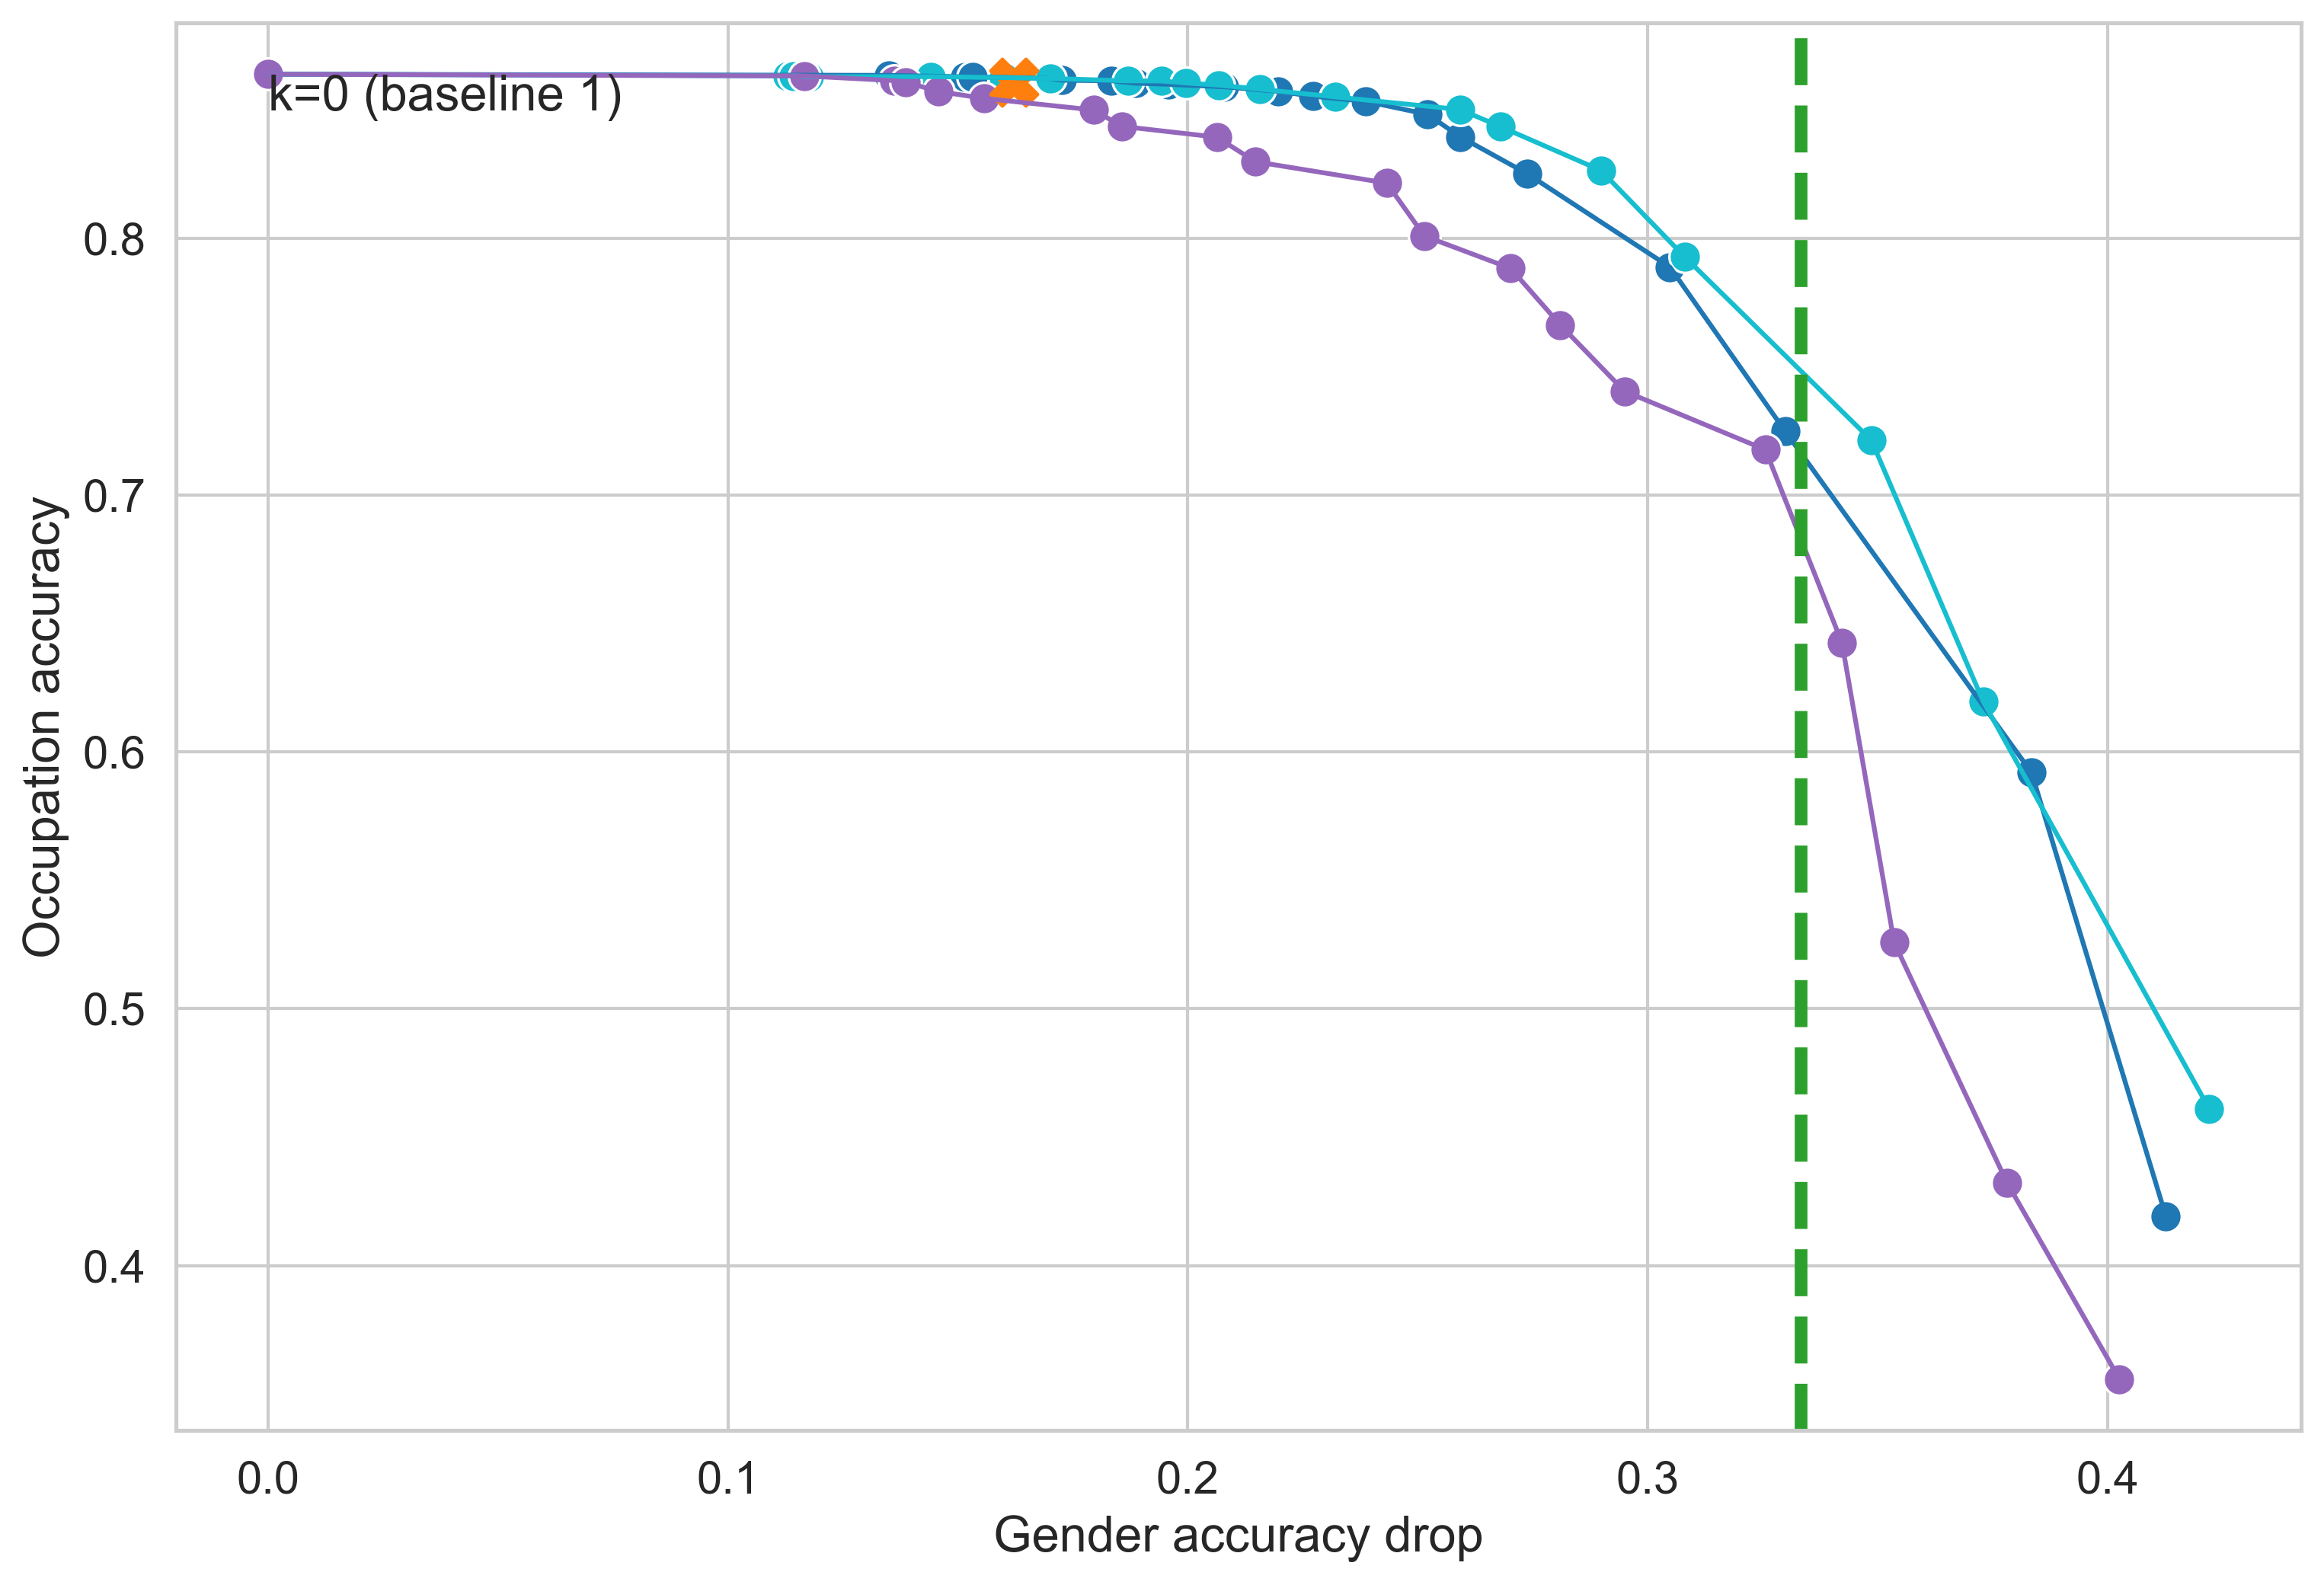

In [26]:
#With all methods:

legend = False

sns.set(font_scale=1.3)
sns.set_style("white" if legend else "whitegrid")

# Calculate gender accuracy drop
acc_gender_drop = [acc_gender_baseline1 - ag for ag in acc_gender]
acc_gender_baseline2_drop = acc_gender_baseline1 - acc_gender_baseline2
min_gender_drop = acc_gender_baseline1 - min_gender
acc_gender_method2_drop = [acc_gender_baseline1 - ag for ag in acc_gender_method2]
acc_gender_method3_drop = [acc_gender_baseline1 - ag for ag in acc_gender_method3]

# Custom colors
our_method_color = "#1f77b4"  # Blue
baseline2_color = "#ff7f0e"  # Orange
min_gender_color = "#2ca02c"  # Green
method2_color = "#17becf"  # Cyan
method3_color = "#9467bd"  # Purple

# Prepare DataFrame
data = {
    "Number of concepts removed": concept_removed,
    "Gender Accuracy Drop Model 1": acc_gender_drop,
    "Occupation Accuracy Model 1": acc_occ,
    "Gender Accuracy Drop Model 2": acc_gender_method2_drop,
    "Occupation Accuracy Model 2": acc_occ_method2,
    "Gender Accuracy Drop Model 3": acc_gender_method3_drop,
    "Occupation Accuracy Model 3": acc_occ_method3
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 8), dpi=300)

# Plot the data for Model 1
line1 = sns.lineplot(data=df, x="Gender Accuracy Drop Model 1", y="Occupation Accuracy Model 1", color=our_method_color, markersize=10, label= 'Our method')
sns.scatterplot(data=df, x="Gender Accuracy Drop Model 1", y="Occupation Accuracy Model 1", color=our_method_color, s=100)

# Plot the data for Model 2
sns.lineplot(data=df, x="Gender Accuracy Drop Model 2", y="Occupation Accuracy Model 2", color=method2_color, markersize=10, label= method_name2 + ' variant')
sns.scatterplot(data=df, x="Gender Accuracy Drop Model 2", y="Occupation Accuracy Model 2", color=method2_color, s=100)

# Plot the data for Model 3
sns.lineplot(data=df, x="Gender Accuracy Drop Model 3", y="Occupation Accuracy Model 3", color=method3_color, markersize=10, label= method_name3 + ' variant')
sns.scatterplot(data=df, x="Gender Accuracy Drop Model 3", y="Occupation Accuracy Model 3", color=method3_color, s=100)

# Add baseline points
plt.scatter([acc_gender_baseline2_drop], [acc_occ_baseline2], s=220, marker='X', color=baseline2_color)
existing_handles, existing_labels = plt.gca().get_legend_handles_labels()
existing_handles.append(Line2D([0], [0], marker='X', markersize=10, color=baseline2_color, linestyle='None'))
existing_labels.append('Baseline 2 (Bios-Neutral)')

# Add green line
plt.axvline(x=min_gender_drop, ymin=0, ymax=1, color=min_gender_color, linestyle='--', linewidth=4.0)
existing_handles.append(Line2D([], [], color=min_gender_color, linestyle='--', label='Green Line'))
existing_labels.append('Gender prediction from occupation')

# Add text annotations
keep = [0]#, 1, 16, 19]
for i in keep:
    row = df.iloc[i]
    text = f'k={int(row["Number of concepts removed"])}'  # Ensure k is an integer
    if i == 0:
        text = 'k=0 (baseline 1)'
    plt.text(row["Gender Accuracy Drop Model 1"], row["Occupation Accuracy Model 1"], text, ha='left', va='top')

# Set axis limits
plt.xlim([min(min(acc_gender_drop), min(acc_gender_method2_drop), min(acc_gender_method3_drop)) - 0.02, max(max(acc_gender_drop), max(acc_gender_method2_drop), max(acc_gender_method3_drop)) + 0.02])
plt.ylim([min(min(acc_occ), min(acc_occ_method2), min(acc_occ_method3)) - 0.02, max(max(acc_occ), max(acc_occ_method2), max(acc_occ_method3)) + 0.02])

# Add axis labels
plt.xlabel("Gender accuracy drop")
plt.ylabel("Occupation accuracy")

# Add legend
if legend:
    plt.legend(existing_handles, existing_labels, title='Method', loc='best')
else:
    line1.get_legend().remove()

plt.show()

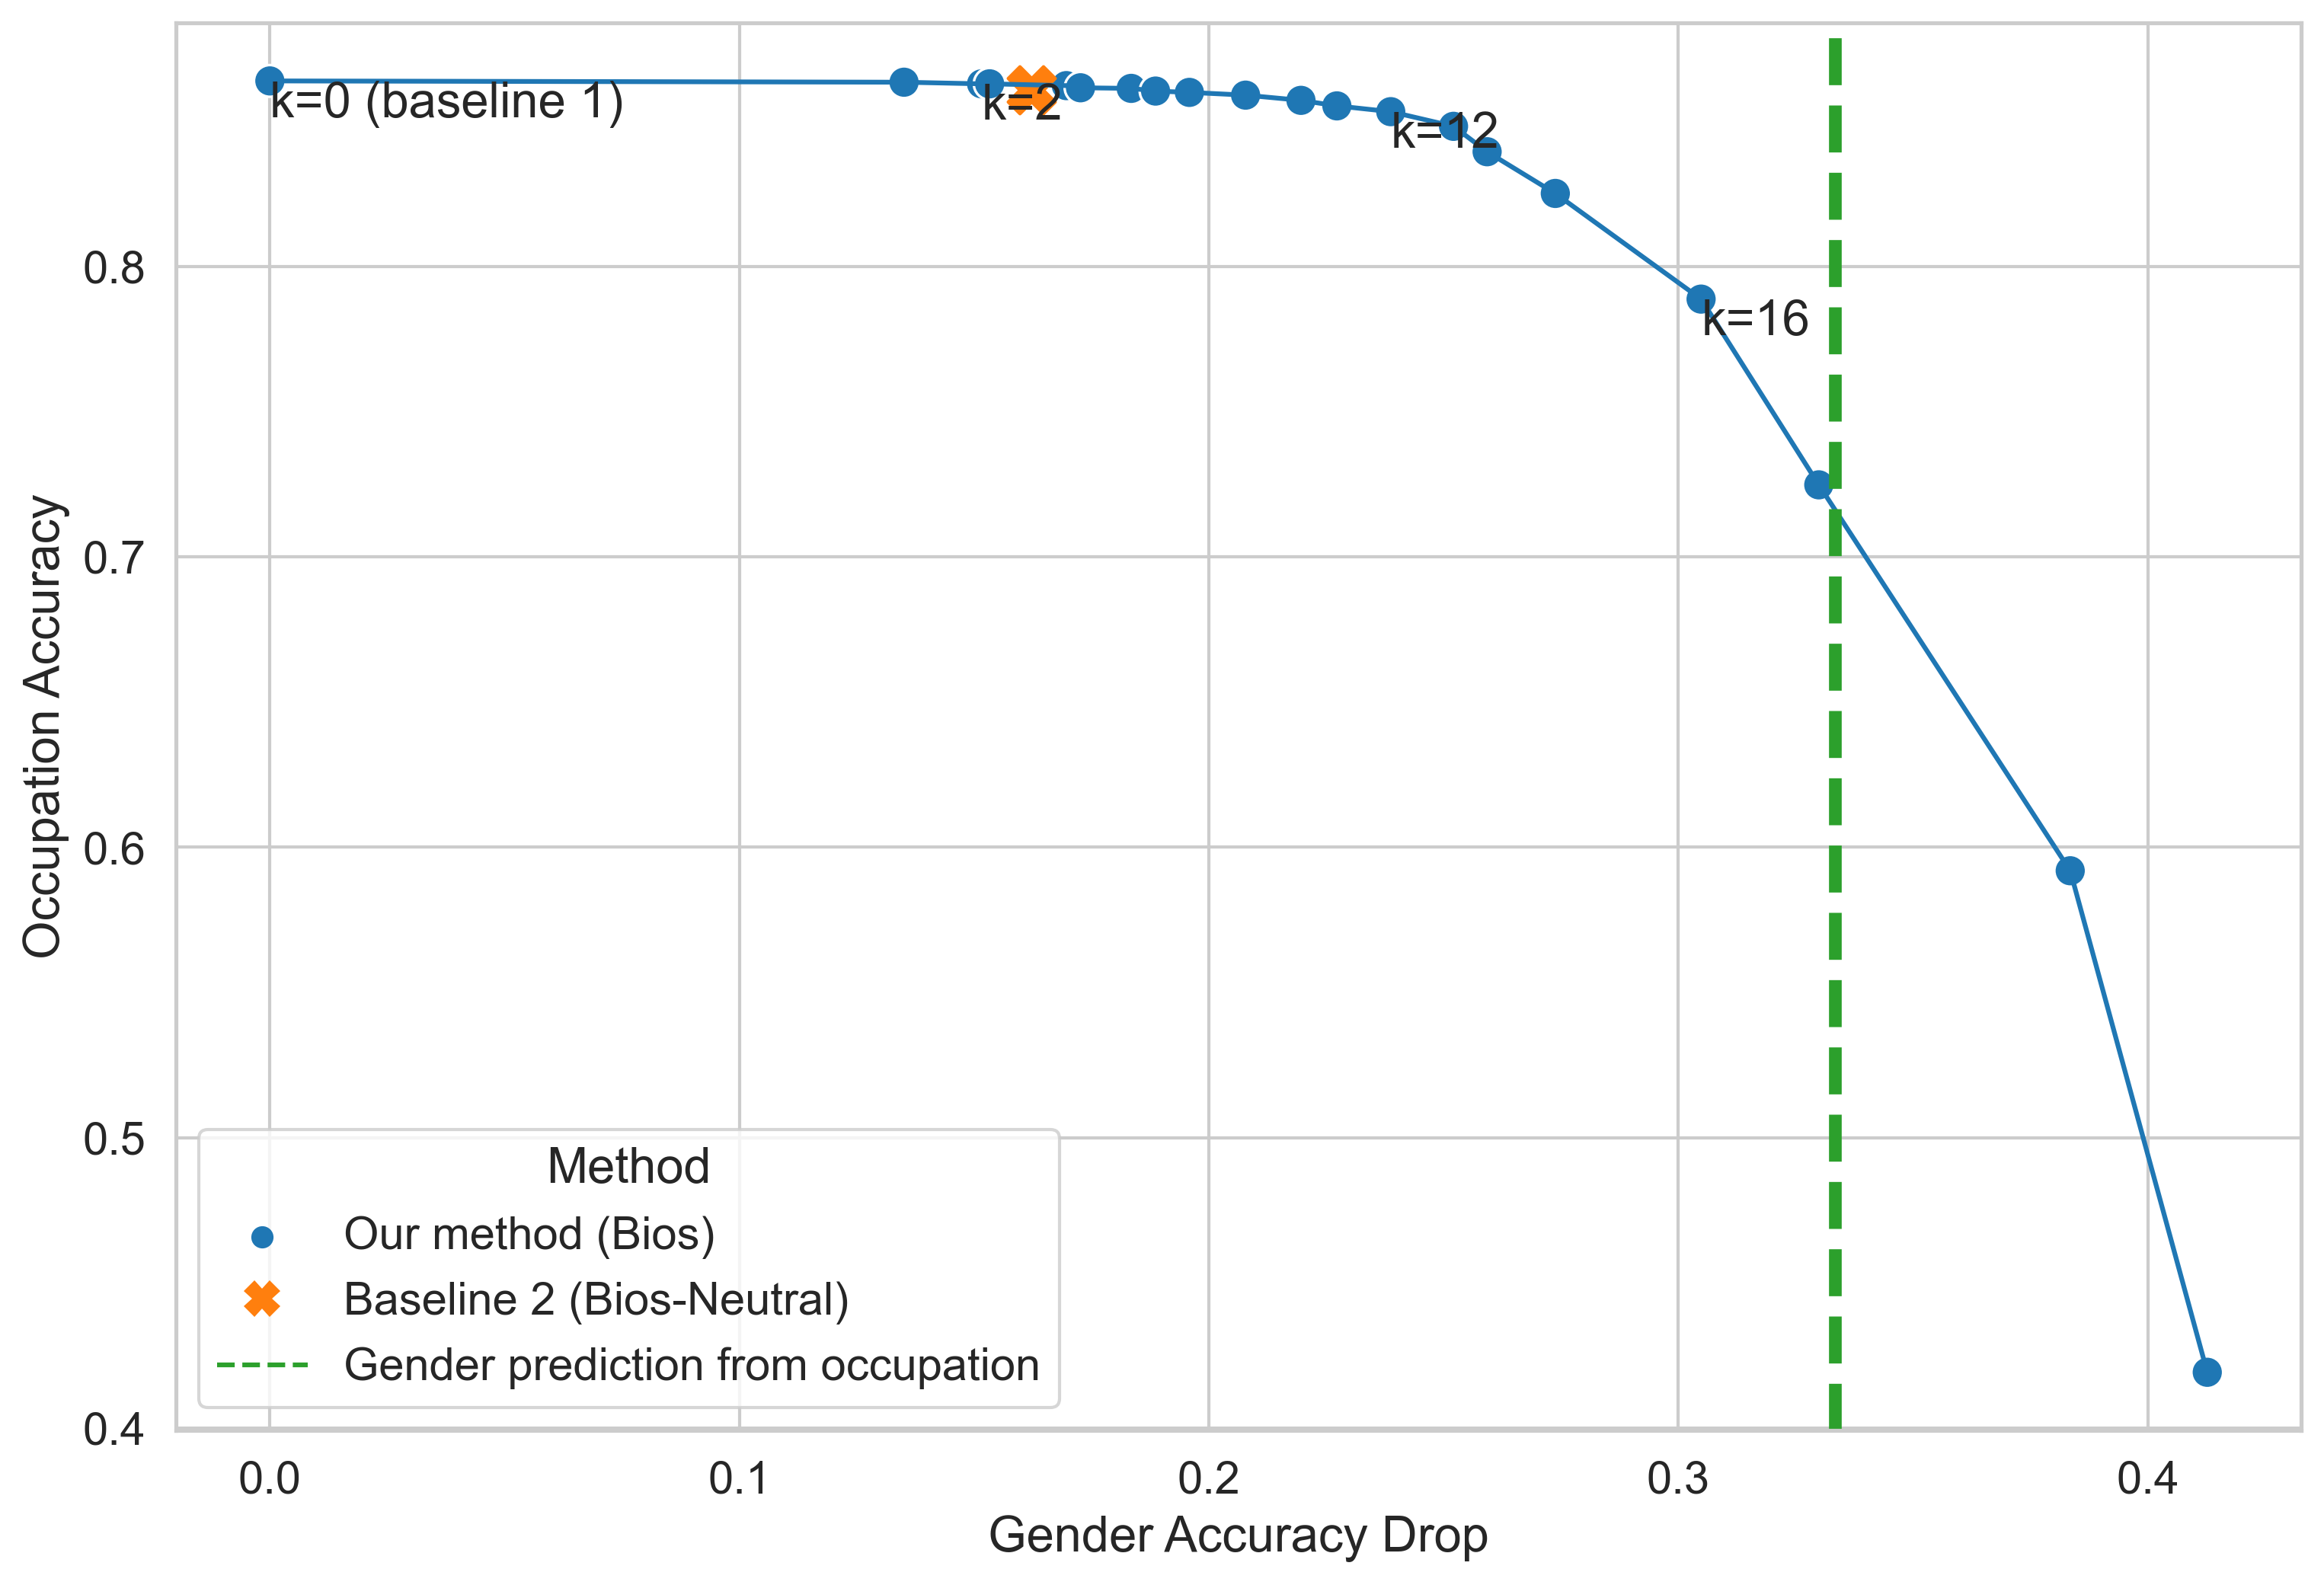

In [23]:
#With only one method:

# Calculate gender accuracy drop
max_gender = acc_gender[0]
acc_gender_drop = [max_gender - ag for ag in acc_gender]
acc_gender_baseline2_drop = max_gender - acc_gender_baseline2
min_gender_drop = max_gender - min_gender

# Prepare DataFrame
df = pd.DataFrame({
    "Number of concepts removed": concept_removed,
    "Gender Accuracy Drop": acc_gender_drop,
    "Occupation Accuracy": acc_occ,
    "Model": ['Our method (Bios)'] * len(acc_gender_drop)
})

plt.figure(figsize=(12, 8), dpi=300)

# Plot the data
sns.lineplot(data=df, x="Gender Accuracy Drop", y="Occupation Accuracy", hue="Model", palette=[our_method_color], markersize=10, legend=None)
sns.scatterplot(data=df, x="Gender Accuracy Drop", y="Occupation Accuracy", hue="Model", palette=[our_method_color], s=100)

# Add baseline points
plt.scatter([acc_gender_baseline2_drop], [acc_occ_baseline2], s=220, marker='X', color=baseline2_color)
existing_handles, existing_labels = plt.gca().get_legend_handles_labels()
existing_handles.append(Line2D([0], [0], marker='X', markersize=10, color=baseline2_color, linestyle='None'))
existing_labels.append('Baseline 2 (Bios-Neutral)')

# Add green line
plt.axvline(x=min_gender_drop, ymin=0, ymax=1, color=min_gender_color, linestyle='--', linewidth=4.0)
existing_handles.append(Line2D([], [], color=min_gender_color, linestyle='--', label='Green Line'))
existing_labels.append('Gender prediction from occupation')

# Add text annotations
keep = [0, 2, 12, 16]
for i in keep:
    row = df.iloc[i]
    text = f'k={row["Number of concepts removed"]}'
    if i == 0:
        text = 'k=0 (baseline 1)'
    plt.text(row["Gender Accuracy Drop"], row["Occupation Accuracy"], text, ha='left', va='top')

# Set axis limits
plt.xlim([min(acc_gender_drop) - 0.02, max(acc_gender_drop) + 0.02])
plt.ylim([min(acc_occ) - 0.02, max(acc_occ) + 0.02])

# Add legend
plt.legend(existing_handles, existing_labels, title='Method', loc='best')

plt.show()

# Explanations

In [ ]:
import pickle
import numpy as np

global_importance_gender = pickle.load(open(f'global_importance/gi_gender_{modeltype}_{method_name}{num_components}_{mlp_or_lin}_baseline_{baseline}.pkl',"rb"))
global_importance_occ = pickle.load(open(f'global_importance/gi_occupation_{modeltype}_{method_name}{num_components}_{mlp_or_lin}_baseline_{baseline}.pkl',"rb"))

In [ ]:
angle = np.arctan(global_importance_occ / global_importance_gender) * 180 / np.pi

sentences_train = []

for k in range(len(dt_X_train)):
    sentences_train.append(dt_X_train[k][0])

gender_pred_train = torch.argmax(pg_model(train_features), -1)
label_pred_train = torch.argmax(model.end_model(train_features), -1)

sentences_train = np.array(sentences_train)
train_labels = np.array(train_labels)
label_pred_train = np.array(label_pred_train)
gender_train = np.array(gender_train)
gender_pred_train = np.array(gender_pred_train)

names_g = ['F', 'M']
names_occ = ['surgeon', 'pastor', 'photographer', 'professor', 'chiropractor', 'software_engineer', 'teacher', 'poet', 'dj', 'rapper', 'paralegal', 'physician', 
              'journalist', 'architect', 'attorney', 'yoga_teacher', 'nurse', 'painter', 'model', 'composer', 'personal_trainer','filmmaker', 'comedian', 'accountant', 
              'interior_designer', 'dentist', 'psychologist', 'dietitian']


In [ ]:
from TaCo.explaination import occlusion_concepts, viz_concepts, print_legend, print_legend2
import random

#sentences_type = "n bios for each concept"
#sentences_type = "random sentences"
sentences_type = "selected sentences"

if modeltype == "RoBERTa":
    l_concept_id = [15, 18, 19]
    colors = {0: "rgba(255, 102, 122, ",
              1: "rgba(179, 174, 54, ", 
              2: "rgba(45, 136, 179, "}
    
elif modeltype == "DistilBERT":
    l_concept_id = [13, 16, 17] 
    colors = {0: "rgba(91, 51, 255, ",
              1: "rgba(193, 51, 255, ", 
              2: "rgba(255, 51, 164, "}

angle = np.arctan(global_importance_occ / global_importance_gender) * 180 / np.pi
sorted_indices = sorted(range(len(angle)), key=lambda i: angle[i], reverse=False)
conceptnames = [sorted_indices.index(i) + 1 for i in l_concept_id]


if sentences_type == "n bios for each concept":
    n = 2 #number of bios for each concepts
    l_mip_ids, l_mip_sentences, l_mip_label, l_mip_predict_label, l_mip_gender, l_mip_predict_gender = [], [], [], [], [], []
    for concept_id in l_concept_id:
        mip_ids = np.argsort(U_train[:, concept_id].numpy())[::-1][:n]
        l_mip_ids.extend(mip_ids)
        l_mip_sentences.extend(sentences_train[mip_ids])
        l_mip_label.extend(train_labels[mip_ids])
        l_mip_predict_label.extend(label_pred_train[mip_ids])
        l_mip_gender.extend(gender_train[mip_ids])
        l_mip_predict_gender.extend(gender_pred_train[mip_ids])


else:
    if sentences_type == "selected sentences":
        if modeltype == "RoBERTa":
            l_mip_ids = [230484, 7029, 155554, 94984, 82706, 254362, 205272, 226245, 81814, 227333, 90373, 82798, 143102, 261617, 
                          219844, 125561, 39863, 246224, 265371, 155464, 123403, 229367]
        elif modeltype == "DistilBERT":
            l_mip_ids = [142293, 96384, 163939, 234490, 172463, 126052, 171392, 5941, 78211, 19448, 25222, 117517,
                         110738, 36185, 60128, 138762]
    
    elif sentences_type == "random sentences":
        l_mip_ids = random.sample(range(len(sentences_train)), 200)

    l_mip_sentences = sentences_train[l_mip_ids]
    l_mip_label = train_labels[l_mip_ids]
    l_mip_predict_label = label_pred_train[l_mip_ids]
    l_mip_gender = gender_train[l_mip_ids]
    l_mip_predict_gender = gender_pred_train[l_mip_ids]

In [ ]:
extract_fct, l_ignore_words = "word", ["’", "'", ",", ".", "...", "..", "....", ":", "!", "?", "", " ", "(", ")"]
#extract_fct, l_ignore_words = "clause", []

print("gender importance / occupation importance")
print_legend2(colors, l_concept_id, global_importance_gender, global_importance_occ, conceptnames)
#colors = print_legend(l_concept_id, global_importance_gender, global_importance_occ, conceptnames)

i = 0
for sentence in l_mip_sentences:
  print('sentence:', l_mip_ids[i])
  print('occupation: true label:', names_occ[int(l_mip_label[i])], '; predicted label:', names_occ[int(l_mip_predict_label[i])])
  print('gender: true label:', names_g[l_mip_gender[i]], '; predicted label:', names_g[l_mip_predict_gender[i]])

  phi = occlusion_concepts(sentence, model, tokenizer, W, l_concept_id, ignore_words = l_ignore_words, extract_fct = extract_fct, device = device)
  
  phi /= np.max(np.abs(phi)) + 1e-5
  viz_concepts(sentence, phi, colors, ignore_words = l_ignore_words, extract_fct = extract_fct)
  i += 1

gender importance / occupation importance


sentence: 142293
occupation: true label: surgeon ; predicted label: surgeon
gender: true label: M ; predicted label: M


sentence: 96384
occupation: true label: surgeon ; predicted label: surgeon
gender: true label: M ; predicted label: M


sentence: 163939
occupation: true label: dentist ; predicted label: dentist
gender: true label: M ; predicted label: M


sentence: 234490
occupation: true label: physician ; predicted label: physician
gender: true label: F ; predicted label: F


sentence: 172463
occupation: true label: surgeon ; predicted label: surgeon
gender: true label: M ; predicted label: M


sentence: 126052
occupation: true label: photographer ; predicted label: photographer
gender: true label: M ; predicted label: M


sentence: 171392
occupation: true label: professor ; predicted label: professor
gender: true label: M ; predicted label: M


sentence: 5941
occupation: true label: professor ; predicted label: professor
gender: true label: F ; predicted label: F


sentence: 78211
occupation: true label: journalist ; predicted label: journalist
gender: true label: F ; predicted label: F


sentence: 19448
occupation: true label: photographer ; predicted label: photographer
gender: true label: M ; predicted label: M


sentence: 25222
occupation: true label: professor ; predicted label: professor
gender: true label: F ; predicted label: F


sentence: 117517
occupation: true label: professor ; predicted label: professor
gender: true label: M ; predicted label: M


sentence: 110738
occupation: true label: surgeon ; predicted label: attorney
gender: true label: M ; predicted label: M


sentence: 36185
occupation: true label: professor ; predicted label: professor
gender: true label: M ; predicted label: M


sentence: 60128
occupation: true label: composer ; predicted label: composer
gender: true label: M ; predicted label: M


sentence: 138762
occupation: true label: nurse ; predicted label: nurse
gender: true label: F ; predicted label: F
